In [2]:
from nn import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("digit_data.csv")

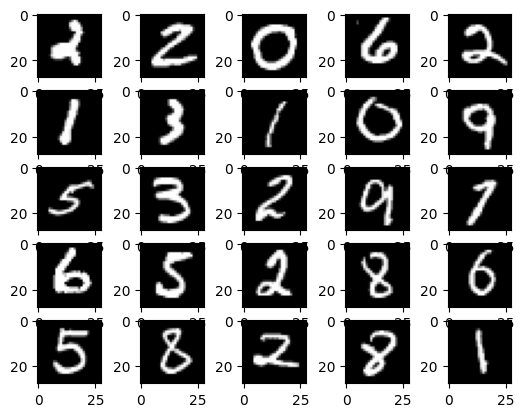

In [4]:
def plot_digits(digits):
    for i, pixels in enumerate(digits.iloc):
        plt.subplot(5,5,i+1)
        plt.imshow(pixels[1:].to_numpy().reshape(28,28), cmap='gray')
        
plot_digits(data.iloc[np.random.randint(0, data.shape[0], (25,))])

In [5]:
data = data.to_numpy()
np.random.shuffle(data)

X = data[:, 1:] / data[:, 1:].max()
y = data[:, 0]
target = np.zeros((y.shape[0], y.max()+1))

for i, row in enumerate(target):
    row[y[i]] = 1
    
y = target
print(X.shape, y.shape)
x_train, y_train, x_test, y_test = X[:40000].T, y[:40000].T, X[40000:].T, y[40000:].T
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(42000, 784) (42000, 10)
(784, 40000) (10, 40000) (784, 2000) (10, 2000)


In [6]:
model = Model(categorical_cross_entropy)
model.add_layer(Layer(784, 100, activation=ReLU))
model.add_layer(Layer(100, 10, activation=softmax))

In [7]:
model.fit(x_train, y_train, iter=100, lr=0.2)

epoch: 1/100		loss: 2.2998104735095075		accuracy:0.190025
epoch: 2/100		loss: 2.2869738981510035		accuracy:0.2787
epoch: 3/100		loss: 2.2738773854169296		accuracy:0.379175
epoch: 4/100		loss: 2.260035501319733		accuracy:0.45095
epoch: 5/100		loss: 2.24499346339052		accuracy:0.505225
epoch: 6/100		loss: 2.228322930681439		accuracy:0.544525
epoch: 7/100		loss: 2.209619260451853		accuracy:0.570625
epoch: 8/100		loss: 2.188531587725381		accuracy:0.59015
epoch: 9/100		loss: 2.164754825877409		accuracy:0.604975
epoch: 10/100		loss: 2.1380410616369265		accuracy:0.614775
epoch: 11/100		loss: 2.108154074038154		accuracy:0.62275
epoch: 12/100		loss: 2.0748862428892267		accuracy:0.631325
epoch: 13/100		loss: 2.038084834045087		accuracy:0.638825
epoch: 14/100		loss: 1.9976594466407371		accuracy:0.6474
epoch: 15/100		loss: 1.9536144625616894		accuracy:0.6555
epoch: 16/100		loss: 1.9060637220607466		accuracy:0.665775
epoch: 17/100		loss: 1.8552635935531854		accuracy:0.675125
epoch: 18/100		loss: 1.8

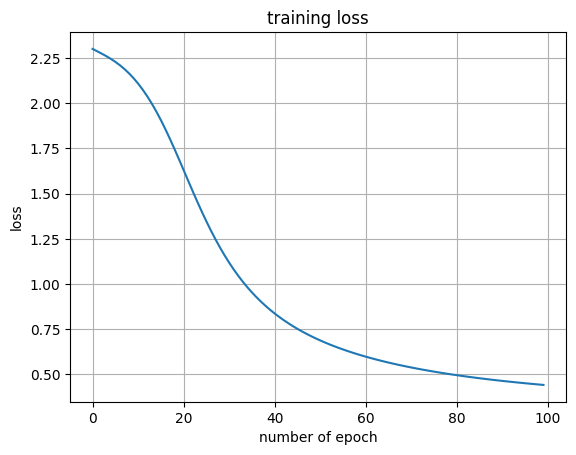

In [10]:
plt.plot(model.loss_log)
plt.title("training loss")
plt.xlabel("number of epoch")
plt.ylabel("loss")
plt.grid()

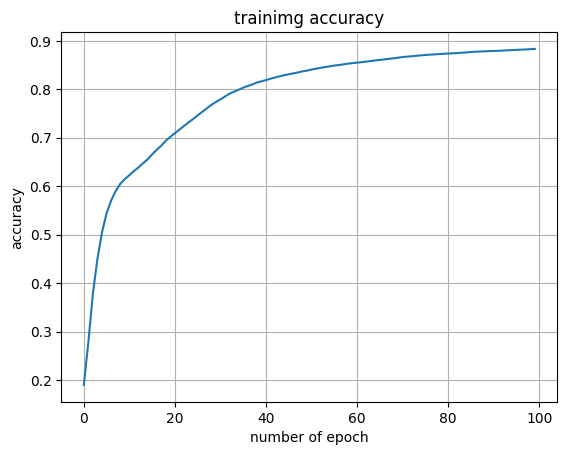

In [11]:
plt.plot(model.accuracy_log)
plt.title("trainimg accuracy")
plt.xlabel("number of epoch")
plt.ylabel("accuracy")
plt.grid()